In [2]:
import folium
import pandas as pd
import numpy as np

In [3]:
from folium.features import ColorLine

In [4]:
%matplotlib inline

In [5]:
from math import sin,cos,sqrt,atan2, radians, degrees, atan

In [7]:
raw  =pd.read_csv("raw_data_collected/dataOut_14March18.csv", header=None, names=['Date','Time','Lat','Lon','GPS_Alt','Pressure','Pres_Alt','Temp','Batt'])

In [8]:
#remove the first line if its text
raw=raw[1:]

In [9]:
raw['Lat_Rad']=raw.Lat.apply(lambda x: radians(x))
raw['Lon_Rad']=raw.Lon.apply(lambda x: radians(x))

In [10]:
raw['Lat_Delta']=raw.Lat[:-1] - raw.Lat[1:].values # current value minus next value
raw['Lon_Delta']=raw.Lon[:-1] - raw.Lon[1:].values
raw['Lat_Rad_Delta']=raw.Lat_Rad[:-1] - raw.Lat_Rad[1:].values
raw['Lon_Rad_Delta']=raw.Lon_Rad[:-1] - raw.Lon_Rad[1:].values

In [11]:
raw.Lat_Delta.describe()

count    2.406600e+04
mean    -1.333832e-08
std      2.009162e-05
min     -7.670000e-04
25%     -3.000000e-06
50%      0.000000e+00
75%      4.000000e-06
max      7.780000e-04
Name: Lat_Delta, dtype: float64

In [12]:
level = 1.0e-06

In [13]:
data = raw[(abs(raw.Lat_Delta) > level) | (abs(raw.Lon_Delta) > level)]

In [14]:
1.0*data.shape[0]/raw.shape[0]

0.7118876469854988

In [16]:
data['GPS_Alt_Delta']=data.GPS_Alt[1:]-data.GPS_Alt[:-1].values #next value minus current

C:\Users\jjc\Anaconda3\envs\general\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
data.head(5)

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt,Lat_Rad,Lon_Rad,Lat_Delta,Lon_Delta,Lat_Rad_Delta,Lon_Rad_Delta,GPS_Alt_Delta
1,03/14/2018,08:17:34,45.015327,6.127997,1686.2,1.101200e+10,1706.225,17.9,3.957,0.785666,0.106954,-0.000004,5.000000e-07,-6.981317e-08,8.726646e-09,NaN
2,03/14/2018,08:17:35,45.015331,6.127996,1685.9,1.101200e+10,1706.225,17.9,3.874,0.785666,0.106954,-0.000004,-1.000000e-06,-6.981317e-08,-1.745329e-08,-0.3
3,03/14/2018,08:17:36,45.015335,6.127997,1685.6,1.101200e+10,1706.127,17.9,3.874,0.785666,0.106954,-0.000004,5.200000e-06,-6.981317e-08,9.075712e-08,-0.3
4,03/14/2018,08:17:38,45.015339,6.127992,1685.6,1.101200e+10,1706.325,17.9,3.867,0.785666,0.106954,-0.000011,2.000000e-06,-1.919862e-07,3.490659e-08,0.0
5,03/14/2018,08:17:39,45.015350,6.127990,1684.4,1.101200e+10,1706.225,17.9,3.874,0.785666,0.106954,-0.000016,2.300000e-06,-2.792527e-07,4.014257e-08,-1.2


In [18]:
data.Lat.describe()

count    17133.000000
mean        44.998512
std          0.008318
min         44.985039
25%         44.994320
50%         44.996658
75%         44.998699
max         45.023487
Name: Lat, dtype: float64

In [19]:
data.Lon.describe()

count    17133.000000
mean         6.175282
std          0.023376
min          6.126662
25%          6.171536
50%          6.174577
75%          6.192026
max          6.226315
Name: Lon, dtype: float64

In [20]:
def calc_distance(row):
    
    dlat = row['Lat_Rad_Delta']
    dlon= row['Lon_Rad_Delta']
    lat1 = row['Lat_Rad']
    lat2 = row['Lat_Rad'] + dlat
    #calc haversine distance
    R=6373000.0
    
    a=sin(dlat/2)**2 +cos(lat1) *cos(lat2) *sin(dlon /2)**2
    c= 2 *atan2(sqrt(a),sqrt(1-a))
    return R*c

In [21]:
lat1=radians(52.22)
lat2=radians(52.40)
lon1=radians(21.01)
lon2=radians(16.92)
lat_delta=lat2-lat1
lon_delta=lon2-lon1
test={'Lat_Rad_Delta':lat_delta,'Lon_Rad_Delta':lon_delta,'Lat_Rad':lat1 }

In [22]:
test

{'Lat_Rad_Delta': 0.0031415926535897087,
 'Lon_Rad_Delta': -0.07138396640656802,
 'Lat_Rad': 0.9114109353914389}

In [24]:
print(calc_distance(test))
#should be 278.54

278821.2729803786


In [25]:
data['distance']=data.apply(calc_distance,axis=1)

C:\Users\jjc\Anaconda3\envs\general\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
data.distance.describe()

count    17133.000000
mean         2.475457
std         14.714129
min          0.078623
25%          0.446030
50%          1.161985
75%          3.886400
max       1885.106109
Name: distance, dtype: float64

In [27]:
def clip(x):
    
    if x == 0.0 or x is None:
        return 0.00001
    else:
        return x

In [28]:
def calc_gradient(row):
    
    dist= clip(row['distance'])
    height = clip(row['GPS_Alt_Delta'])
    
    return degrees(atan(dist/height ))

In [30]:
test_angle={'distance':1.0,'GPS_Alt_Delta':-1.0}
print(calc_gradient(test_angle))

-45.0


In [31]:
#gradient
data['gradient'] = data.apply(calc_gradient,axis=1)

C:\Users\jjc\Anaconda3\envs\general\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
data.gradient.describe()

count    17132.000000
mean         6.626043
std         71.024457
min        -89.917411
25%        -74.365425
50%         21.468517
75%         79.072125
max         90.000000
Name: gradient, dtype: float64

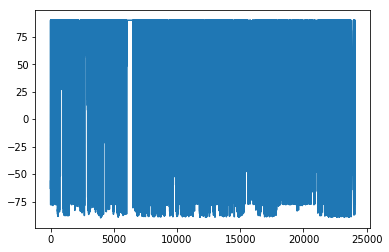

In [33]:
data.gradient.plot()

In [34]:
def calc_grad_colour(row):
    
    grad=row['gradient']
    
    if grad >=3.0:
        return 0 #'#FF0000' #red
    elif grad >= -5.0:
        return 1 #'#00FF00' #green
    else:
        return 2#'#0000FF' #blue
        

In [86]:
test_grad_colour={'gradient':-1,'GPS_Alt_Delta':-1.0}
print(calc_grad_colour(test_grad_colour))

1


In [37]:
data['grad_colour']=data.apply(calc_grad_colour,axis=1)

C:\Users\jjc\Anaconda3\envs\general\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
data[data.grad_colour==1]

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt,Lat_Rad,Lon_Rad,Lat_Delta,Lon_Delta,Lat_Rad_Delta,Lon_Rad_Delta,GPS_Alt_Delta,distance,gradient,grad_colour
108,03/14/2018,08:19:33,45.015343,6.127998,1681.6,1.101200e+10,1705.242,16.9,3.867,0.785666,0.106954,0.000000,1.000000e-06,0.000000e+00,1.745329e-08,-0.9,0.078630,-4.993082,1
151,03/14/2018,08:20:21,45.015316,6.128022,1683.3,1.101200e+10,1705.635,16.5,3.854,0.785665,0.106954,0.000000,1.400000e-06,0.000000e+00,2.443461e-08,-1.5,0.110082,-4.197316,1
244,03/14/2018,08:22:02,45.015400,6.128005,1676.3,1.101200e+10,1704.061,15.7,3.867,0.785667,0.106954,0.000000,-1.000000e-06,0.000000e+00,-1.745329e-08,-1.9,0.078630,-2.369795,1
388,03/14/2018,08:24:42,45.015312,6.128004,1675.7,1.101200e+10,1704.946,14.7,3.867,0.785665,0.106954,0.000000,-1.400000e-06,0.000000e+00,-2.443461e-08,-2.5,0.110082,-2.521276,1
2357,03/14/2018,09:01:18,45.008457,6.145727,2200.6,1.022022e+10,2229.361,12.5,3.829,0.785546,0.107263,0.000000,1.000000e-06,0.000000e+00,1.745329e-08,1.6,0.078640,2.813815,1
3606,03/14/2018,09:24:31,44.996490,6.171952,2594.1,1.020121e+10,2624.478,13.7,3.803,0.785337,0.107721,0.000000,1.000000e-06,0.000000e+00,1.745329e-08,1.8,0.078656,2.502112,1
3710,03/14/2018,09:26:27,44.996571,6.172047,2595.5,1.020121e+10,2625.450,13.8,3.816,0.785338,0.107723,0.000004,4.000000e-07,6.981317e-08,6.981317e-09,-11.3,0.446030,-2.260389,1
3736,03/14/2018,09:26:56,44.996284,6.171963,2580.3,1.020121e+10,2625.017,13.7,3.803,0.785333,0.107721,-0.000004,6.700000e-06,-6.981317e-08,1.169371e-07,23.6,0.689696,1.673959,1
4548,03/14/2018,09:42:02,44.997711,6.204564,3155.7,1.011020e+10,3200.050,13.5,3.796,0.785358,0.108290,0.000000,1.400000e-06,0.000000e+00,2.443461e-08,-2.4,0.110116,-2.626991,1
4660,03/14/2018,09:44:07,44.997776,6.204602,3167.2,1.011020e+10,3200.967,14.1,3.803,0.785359,0.108291,0.000000,-2.400000e-06,0.000000e+00,-4.188790e-08,-2.5,0.188771,-4.318110,1


In [88]:
line_colour_data = list(data.grad_colour)
line_colour_data[0:3]

[2, 2, 2]

In [76]:
line_data = zip(data.Lat,data.Lon)

In [77]:
line_data = list(line_data)

In [83]:
folium_map = folium.Map(location=[44.99, 6.226],
                        zoom_start=13,
                        tiles="Stamen Terrain")

In [84]:
colour_line = ColorLine(line_data,line_colour_data,colormap=['r','g','b'])
colour_line.add_to(folium_map)

In [85]:
folium_map